# Disney Analsyis: The Basics
To begin looking at how gender affects dialogue in these movies let's get some basic stats first. Specifically:
* Token count per line
* Type count per line
* Token count per character
* Type counter per character
* TTR per character
I'm not doing TTR line by line, because some of these lines are incredibly short, creating huge TTRs. It's best to look at a character's overall TTR

## 1) Token count

In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
disney_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_disney_annotated.pkl")

In [4]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
Disney_Period       7422 non-null object
Gender              7422 non-null object
Movie               7422 non-null object
Role                7422 non-null object
Song                7422 non-null object
Speaker             7422 non-null object
Speaker_Status      7422 non-null object
Text                7422 non-null object
UTTERANCE_NUMBER    7422 non-null int64
Year                7422 non-null int64
dtypes: int64(2), object(8)
memory usage: 347.9+ KB


In [5]:
disney_by_movie = disney_df.set_index(['Movie'])

In [6]:
disney_by_movie.describe()

,UTTERANCE_NUMBER,Year
count,7422.000000,7422.000000
mean,310.375909,1992.601590
std,204.041589,22.171742
min,1.000000,1937.000000
25%,143.000000,1991.000000
50%,286.000000,1995.000000
75%,447.000000,2010.000000
max,854.000000,2016.000000


In [7]:
disney_df["Tokens"] = disney_df.Text.map(nltk.word_tokenize)

In [8]:
disney_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]"
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]"


In [9]:
disney_df["Types"] = disney_df.Tokens.map(set)

In [10]:
disney_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{wind, from, i, speak, in, mirror, thy, space,..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{wouldst, what, ,, ?, thou, queen, my, know}"
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{all, magic, is, ,, who, fairest, ?, mirror, w..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{but, gentle, not, she, i, can, fair, thy, rag..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{reveal, her, for, ., alas, name, !}"


In [11]:
disney_df["Token_Count"] = disney_df.Tokens.map(len)

In [12]:
disney_df["Type_Count"] = disney_df.Types.map(len)

In [13]:
disney_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{wind, from, i, speak, in, mirror, thy, space,...",26,24
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{wouldst, what, ,, ?, thou, queen, my, know}",8,8
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{all, magic, is, ,, who, fairest, ?, mirror, w...",14,13
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{but, gentle, not, she, i, can, fair, thy, rag...",33,27
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{reveal, her, for, ., alas, name, !}",8,7


In [14]:
disney_df[["Token_Count", "Type_Count"]].describe()

,Token_Count,Type_Count
count,7422.000000,7422.000000
mean,14.005794,11.148612
std,21.246459,11.914911
min,0.000000,0.000000
25%,5.000000,4.000000
50%,9.000000,8.000000
75%,16.000000,14.000000
max,480.000000,181.000000


In [15]:
disney_df[disney_df.Token_Count == 480]

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
5751,LATE,m,Moana,PRO,S,maui,NON-P,"i see what's happening, yeah. you're face to f...",146,2016,"[i, see, what, 's, happening, ,, yeah, ., you,...","{from, strange, i, cold, mini-maui, to, day, f...",480,179


With songs, the average overall token count is about 14, and the average type count is 11, but the standard deviations are quite large. This could be due to song lyrics being included. Let's create a new dataframe, with just dialogue. We can compare stats side by side

In [16]:
disney_df_dialogue = disney_df[disney_df.Song == 'D']

In [17]:
disney_df_dialogue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6812 entries, 0 to 7421
Data columns (total 14 columns):
Disney_Period       6812 non-null object
Gender              6812 non-null object
Movie               6812 non-null object
Role                6812 non-null object
Song                6812 non-null object
Speaker             6812 non-null object
Speaker_Status      6812 non-null object
Text                6812 non-null object
UTTERANCE_NUMBER    6812 non-null int64
Year                6812 non-null int64
Tokens              6812 non-null object
Types               6812 non-null object
Token_Count         6812 non-null int64
Type_Count          6812 non-null int64
dtypes: int64(4), object(10)
memory usage: 532.2+ KB


In [18]:
print(disney_df.Movie.value_counts()) #lines in each movie w/ songs
print(disney_df_dialogue.Movie.value_counts()) #lines in each movie w/o songs

Frozen                       853
Aladdin                      842
Beauty and the Beast         770
The Princess and the Frog    675
Pocahontas                   638
Tangled                      581
Mulan                        554
Cinderella                   497
Sleeping Beauty              461
Brave                        411
The Little Mermaid           395
Moana                        382
Snow White                   363
Name: Movie, dtype: int64
Aladdin                      785
Frozen                       740
Beauty and the Beast         663
The Princess and the Frog    644
Pocahontas                   556
Tangled                      527
Mulan                        509
Cinderella                   475
Sleeping Beauty              434
Brave                        410
The Little Mermaid           377
Moana                        355
Snow White                   337
Name: Movie, dtype: int64


In [19]:
print(disney_df.Movie.value_counts().describe()) #lines in each movie w/ songs
print(disney_df_dialogue.Movie.value_counts().describe()) #w/o songs

count     13.000000
mean     570.923077
std      173.540803
min      363.000000
25%      411.000000
50%      554.000000
75%      675.000000
max      853.000000
Name: Movie, dtype: float64
count     13.000000
mean     524.000000
std      146.740133
min      337.000000
25%      410.000000
50%      509.000000
75%      644.000000
max      785.000000
Name: Movie, dtype: float64


In [20]:
print(disney_df[["Token_Count", "Type_Count"]].describe())
print('\n')
print(disney_df_dialogue[["Token_Count", "Type_Count"]].describe())

       Token_Count   Type_Count
count  7422.000000  7422.000000
mean     14.005794    11.148612
std      21.246459    11.914911
min       0.000000     0.000000
25%       5.000000     4.000000
50%       9.000000     8.000000
75%      16.000000    14.000000
max     480.000000   181.000000


       Token_Count   Type_Count
count   6812.00000  6812.000000
mean      12.49956    10.375661
std       14.44401     9.464782
min        0.00000     0.000000
25%        5.00000     4.000000
50%        9.00000     8.000000
75%       15.00000    13.000000
max      300.00000   140.000000


Now, the average token count is 12.5, and the average type count is 10. The standard deviations are also lower!

Let's look at the overall stats for each movie!

In [21]:
disney_df.groupby(['Year', 'Movie'], sort = 'False')[["Token_Count", "Type_Count"]].describe()

Token_Count                                  \
                                     count       mean        std  min  25%   
Year Movie                                                                   
1937 Snow White                      363.0  14.650138  16.265627  1.0  5.0   
1950 Cinderella                      497.0  14.082495  19.046294  1.0  4.0   
1959 Sleeping Beauty                 461.0  11.173536  12.625554  1.0  5.0   
1989 The Little Mermaid              395.0  19.860759  32.151740  2.0  6.0   
1991 Beauty and the Beast            770.0  11.811688  14.507686  2.0  5.0   
1992 Aladdin                         842.0  11.589074  11.038567  2.0  5.0   
1995 Pocahontas                      638.0  13.114420  20.592505  1.0  5.0   
1998 Mulan                           554.0  12.384477  14.876776  1.0  5.0   
2009 The Princess and the Frog       675.0  16.955556  24.156901  1.0  6.0   
2010 Tangled                         581.0  15.242685  24.085365  0.0  4.0   
2012 Brave                           411.0  12.381995  15.136858  2.0  5.0   
2013 Frozen                          853.0  12.572098  21.659411  1.0  4.0   
2016 Moana                           382.0  22.102094  41.327417  1.0  5.0   

                                                  Type_Count             \
                                 50%   75%    max      count       mean   
Year Movie                                                                
1937 Snow White                  9.0  17.5  121.0      363.0  11.016529   
1950 Cinderella                  9.0  16.0  220.0      497.0  10.981891   
1959 Sleeping Beauty             8.0  13.0  128.0      461.0   9.566161   
1989 The Little Mermaid         11.0  22.0  397.0      395.0  14.475949   
1991 Beauty and the Beast        9.0  15.0  290.0      770.0   9.925974   
1992 Aladdin                     8.0  15.0  144.0      842.0   9.966746   
1995 Pocahontas                  8.5  15.0  340.0      638.0  10.724138   
1998 Mulan                       8.0  15.0  188.0      554.0  10.485560   
2009 The Princess and the Frog  10.0  20.0  261.0      675.0  13.481481   
2010 Tangled                     8.0  17.0  257.0      581.0  11.845095   
2012 Brave                       9.0  15.0  190.0      411.0  10.072993   
2013 Frozen                      8.0  14.0  347.0      853.0   9.969519   
2016 Moana                      11.0  23.0  480.0      382.0  15.308901   

                                                                        
                                      std  min  25%   50%   75%    max  
Year Movie                                                              
1937 Snow White                  9.863698  1.0  5.0   8.0  13.5   68.0  
1950 Cinderella                 12.322681  1.0  4.0   7.0  13.0  132.0  
1959 Sleeping Beauty             8.701228  1.0  4.0   7.0  12.0   80.0  
1989 The Little Mermaid         17.409412  2.0  5.0   9.0  17.0  181.0  
1991 Beauty and the Beast        8.857841  2.0  5.0   8.0  13.0  138.0  
1992 Aladdin                     7.957457  2.0  5.0   8.0  13.0   93.0  
1995 Pocahontas                 11.311450  1.0  4.0   8.0  14.0  141.0  
1998 Mulan                       9.982660  1.0  4.0   8.0  13.0  106.0  
2009 The Princess and the Frog  13.532603  1.0  5.0   9.0  17.0  108.0  
2010 Tangled                    13.928021  0.0  3.0   8.0  15.0  134.0  
2012 Brave                       9.209726  2.0  4.0   8.0  13.0   77.0  
2013 Frozen                     11.241335  1.0  4.0   7.0  12.0  148.0  
2016 Moana                      19.148100  1.0  5.0  10.0  18.0  179.0

In [22]:
disney_df_dialogue.groupby(['Year', 'Movie'], sort = 'False')[["Token_Count", "Type_Count"]].describe()

Token_Count                                   \
                                     count       mean        std  min   25%   
Year Movie                                                                    
1937 Snow White                      337.0  13.587537  14.537479  1.0  5.00   
1950 Cinderella                      475.0  12.905263  16.665532  1.0  4.00   
1959 Sleeping Beauty                 434.0  10.762673  11.714320  1.0  5.00   
1989 The Little Mermaid              377.0  15.652520  16.069288  2.0  6.00   
1991 Beauty and the Beast            663.0  11.016591  13.783984  2.0  5.00   
1992 Aladdin                         785.0  10.843312   8.813091  2.0  5.00   
1995 Pocahontas                      556.0  11.467626   9.871099  1.0  5.00   
1998 Mulan                           509.0  11.434185  10.642272  1.0  5.00   
2009 The Princess and the Frog       644.0  14.804348  15.243965  1.0  5.75   
2010 Tangled                         527.0  13.590133  20.620206  0.0  3.00   
2012 Brave                           410.0  11.948780  12.343487  2.0  5.00   
2013 Frozen                          740.0  10.994595  11.223162  2.0  4.00   
2016 Moana                           355.0  17.247887  24.407220  1.0  5.00   

                                                   Type_Count             \
                                 50%    75%    max      count       mean   
Year Movie                                                                 
1937 Snow White                  8.0  16.00  121.0      337.0  10.655786   
1950 Cinderella                  8.0  16.00  220.0      475.0  10.332632   
1959 Sleeping Beauty             8.0  12.00  128.0      434.0   9.403226   
1989 The Little Mermaid         11.0  21.00  129.0      377.0  12.265252   
1991 Beauty and the Beast        8.0  14.00  290.0      663.0   9.405732   
1992 Aladdin                     8.0  14.00   88.0      785.0   9.420382   
1995 Pocahontas                  9.0  15.00   96.0      556.0   9.947842   
1998 Mulan                       9.0  14.00   85.0      509.0   9.903733   
2009 The Princess and the Frog  10.0  18.25  166.0      644.0  12.482919   
2010 Tangled                     8.0  16.00  257.0      527.0  10.796964   
2012 Brave                       9.0  15.00  124.0      410.0   9.939024   
2013 Frozen                      7.0  14.00  138.0      740.0   9.233784   
2016 Moana                      10.0  19.00  300.0      355.0  13.056338   

                                                                        
                                      std  min  25%  50%    75%    max  
Year Movie                                                              
1937 Snow White                  9.422313  1.0  5.0  7.0  13.00   68.0  
1950 Cinderella                 11.292939  1.0  4.0  7.0  13.00  132.0  
1959 Sleeping Beauty             8.592982  1.0  4.0  7.0  12.00   80.0  
1989 The Little Mermaid         10.752965  2.0  5.0  9.0  15.00   85.0  
1991 Beauty and the Beast        8.177955  2.0  5.0  8.0  12.00  138.0  
1992 Aladdin                     6.584737  2.0  5.0  8.0  13.00   53.0  
1995 Pocahontas                  7.529340  1.0  5.0  8.0  13.25   69.0  
1998 Mulan                       7.931086  1.0  4.0  8.0  13.00   61.0  
2009 The Princess and the Frog  10.845932  1.0  5.0  9.0  16.00  101.0  
2010 Tangled                    12.010236  0.0  3.0  7.0  14.00  126.0  
2012 Brave                       8.810901  2.0  4.0  7.5  13.00   77.0  
2013 Frozen                      7.745841  2.0  4.0  7.0  12.00   69.0  
2016 Moana                      13.575784  1.0  5.0  9.0  15.00  140.0

Now that we have the overall averages, let's see how this differs for gender.

What about by era?


In [23]:
disney_df_dialogue.groupby('Disney_Period', sort = False)[["Token_Count", "Type_Count"]].describe()

Token_Count                                                    \
                    count       mean        std  min  25%  50%   75%    max   
Disney_Period                                                                 
EARLY              1246.0  12.343499  14.557268  1.0  5.0  8.0  15.0  220.0   
MID                2890.0  11.734602  11.799282  1.0  5.0  9.0  15.0  290.0   
LATE               2676.0  13.398356  16.756010  0.0  5.0  9.0  16.0  300.0   

              Type_Count                                                    
                   count       mean        std  min  25%  50%   75%    max  
Disney_Period                                                               
EARLY             1246.0  10.096308   9.923096  1.0  4.0  7.0  12.0  132.0  
MID               2890.0   9.974740   8.058224  1.0  5.0  8.0  13.0  138.0  
LATE              2676.0  10.938714  10.564337  0.0  4.0  8.0  14.0  140.0

Interesting. Looks like the early period has longer lines than the middle period, and the later period has longer lines than both the early and late period.

What if we group by gender?

In [24]:
disney_df_dialogue.groupby('Gender', sort = False)[["Token_Count", "Type_Count"]].describe()

Token_Count                                                    \
             count       mean        std  min  25%  50%   75%    max   
Gender                                                                 
f           2900.0  11.939655  14.981125  1.0  4.0  8.0  15.0  300.0   
m           3813.0  12.979019  14.066421  0.0  5.0  9.0  16.0  290.0   
n             99.0  10.434343  11.898518  1.0  4.0  6.0  11.0   72.0   

       Type_Count                                                   
            count       mean       std  min  25%  50%   75%    max  
Gender                                                              
f          2900.0   9.901724  9.555289  1.0  4.0  7.0  13.0  140.0  
m          3813.0  10.785995  9.400489  0.0  5.0  8.0  14.0  138.0  
n            99.0   8.454545  8.410723  1.0  3.0  6.0   9.0   43.0

female speakers tend to speak one token less than male speakers. Females also seem to speak one type less than male speakers. Does this change by movie/era?

In [25]:
sw = disney_df_dialogue[disney_df_dialogue.Movie == 'Snow White']

In [26]:
len(sw)

337

In [27]:
sw.Gender.unique()

array(['f', 'm'], dtype=object)

In [28]:
sw[sw.Gender == 'n']

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count


In [29]:
disney_df_dialogue.groupby(['Movie','Gender'], sort = False)[["Token_Count", "Type_Count"]].describe()

Token_Count                              \
                                       count       mean        std   min   
Movie                     Gender                                           
Snow White                f            123.0  17.650407  19.702286   2.0   
                          m            214.0  11.252336   9.799486   1.0   
Cinderella                f            260.0  13.184615  17.837224   1.0   
                          m            194.0  12.994845  15.541853   1.0   
                          n             21.0   8.619048  10.528420   1.0   
Sleeping Beauty           f            318.0  10.132075  11.232059   1.0   
                          m            114.0  12.640351  12.897916   2.0   
                          n              2.0   4.000000   2.828427   2.0   
The Little Mermaid        f            117.0  15.017094  18.196714   2.0   
                          m            259.0  15.992278  15.047468   2.0   
                          n              1.0   2.000000        NaN   2.0   
Aladdin                   f            118.0   8.177966   5.911934   2.0   
                          m            657.0  11.363775   9.158834   2.0   
                          n             10.0   8.100000   8.723531   2.0   
Beauty and the Beast      f            200.0  10.005000   7.512467   2.0   
                          m            455.0  11.424176  15.728221   2.0   
                          n              8.0  13.125000  16.573968   2.0   
Pocahontas                f            190.0   9.231579   7.431454   1.0   
                          m            365.0  12.635616  10.766061   1.0   
                          n              1.0  10.000000        NaN  10.0   
Mulan                     f            148.0   9.168919   7.528078   1.0   
                          m            346.0  12.447977  11.750740   2.0   
                          n             15.0  10.400000   5.578018   3.0   
The Princess and the Frog f            270.0  14.244444  14.207682   2.0   
                          m            358.0  15.449721  16.210502   1.0   
                          n             16.0   9.812500   6.705408   2.0   
Brave                     f            315.0  12.492063  13.233177   2.0   
                          m             93.0  10.301075   8.610894   2.0   
                          n              2.0   3.000000   1.414214   2.0   
Moana                     f            196.0  15.795918  26.809474   1.0   
                          m            149.0  18.644295  20.859269   1.0   
                          n             10.0  24.900000  23.666432   4.0   
Tangled                   f            295.0  12.538983  18.569167   1.0   
                          m            232.0  14.926724  22.937498   0.0   
Frozen                    f            350.0   9.697143  10.671159   2.0   
                          m            377.0  12.371353  11.717646   2.0   
                          n             13.0   6.000000   2.708013   2.0   

                                                            Type_Count  \
                                    25%   50%    75%    max      count   
Movie                     Gender                                         
Snow White                f        5.00  10.0  24.00  121.0      123.0   
                          m        5.00   8.0  14.00   57.0      214.0   
Cinderella                f        4.00   8.5  16.00  220.0      260.0   
                          m        5.00   9.0  15.75  130.0      194.0   
                          n        2.00   4.0  10.00   38.0       21.0   
Sleeping Beauty           f        4.00   7.0  12.00  128.0      318.0   
                          m        5.00   9.0  16.00   95.0      114.0   
                          n        3.00   4.0   5.00    6.0        2.0   
The Little Mermaid        f        6.00   9.0  17.00  129.0      117.0   
                          m        6.00  11.0  21.00   95.0      259.0   
                          n   

In [52]:
disney_df_dialogue.groupby(['Movie','Gender'], sort = False)["Speaker"].describe()['unique']

Movie                      Gender
Snow White                 f          2
                           m         13
Cinderella                 f          8
                           m         11
                           n          6
Sleeping Beauty            f          7
                           m          8
                           n          1
The Little Mermaid         f          8
                           m         15
                           n          1
Aladdin                    f          2
                           m         22
                           n          4
Beauty and the Beast       f          9
                           m         20
                           n          4
Pocahontas                 f          3
                           m         13
                           n          1
Mulan                      f          5
                           m         28
                           n          9
The Princess and the Frog  f          8
      

In [30]:
mean_tok_by_gender = disney_df_dialogue.groupby(['Movie','Gender'], sort = False)["Token_Count"].describe()

In [56]:
f_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'f']
m_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'm']
f_in_year = f_lines.groupby('Year')['Speaker'].describe()['unique']
m_in_year = m_lines.groupby('Year')['Speaker'].describe()['unique']

f_tok_by_year = f_lines.groupby('Year')["Token_Count"].describe()["mean"]
tok_per_f_by_year = f_tok_by_year / f_in_year
tok_per_f_by_year

Year
1937     8.8252
1950    1.64808
1959    1.44744
1989    1.87714
1991    1.11167
1992    4.08898
1995    3.07719
1998    1.83378
2009    1.78056
2010    3.13475
2012    4.16402
2013    0.53873
2016    2.63265
dtype: object

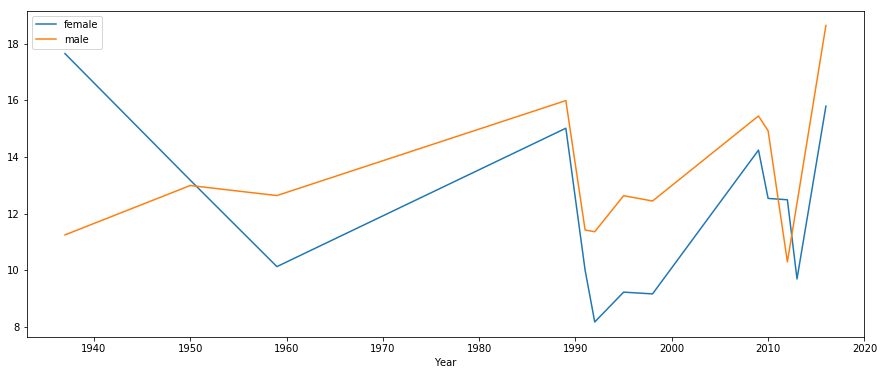

In [70]:
f_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'f']
m_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'm']
#f_in_year = f_lines.groupby('Year')['Speaker'].describe()['unique']
#m_in_year = m_lines.groupby('Year')['Speaker'].describe()['unique']
#this isn't right. I was trying to normalize by gender, but it's already just average token counts by gender
f_tok_by_year = f_lines.groupby('Year')["Token_Count"].describe()["mean"]
#tok_per_f_by_year = f_tok_by_year / f_in_year
m_tok_by_year = m_lines.groupby('Year')["Token_Count"].describe()["mean"]  
#tok_per_m_by_year = m_tok_by_year / m_in_year
f_tok_by_year.plot(figsize = (15,6))
m_tok_by_year.plot(figsize = (15,6))
plt.legend(['female', 'male'])
plt.show()                                                                           

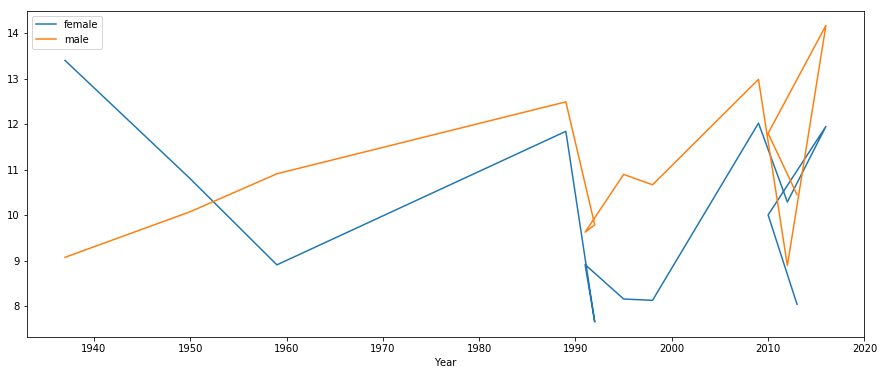

In [71]:
#type counts?
f_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'f']
m_lines = disney_df_dialogue[disney_df_dialogue.Gender == 'm']

f_type_by_year = f_lines.groupby('Year', sort=False)["Type_Count"].describe()['mean']
m_type_by_year = m_lines.groupby('Year', sort=False)["Type_Count"].describe()['mean']  
#FIND A WAY TO GET LABELS ON AXES!!!
#Also, why is this so messed up????
f_type_by_year.plot(figsize = (15, 6))
m_type_by_year.plot(figsize = (15, 6))
plt.legend(['female', 'male'])
plt.show()  

With the exception fo 1938 (Snow White) and 2010 (Tangled), male speakers use a great number of word types per line. 

In [32]:
from matplotlib import pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12002AB0>,
      dtype=object)

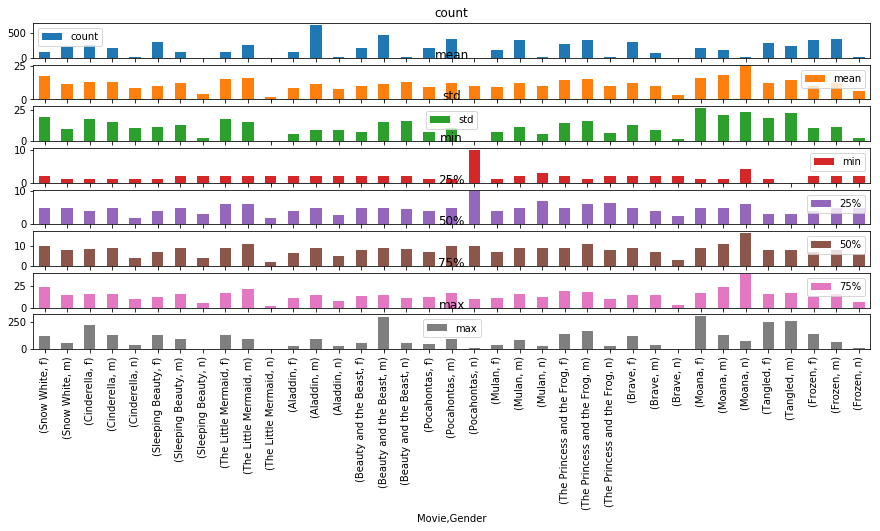

In [33]:
mean_tok_by_gender.plot(kind='bar', subplots=True, figsize=(15,6))

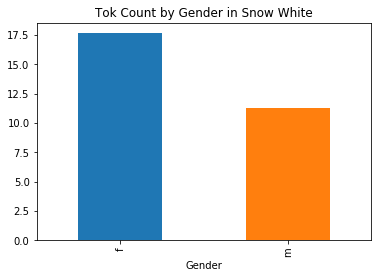

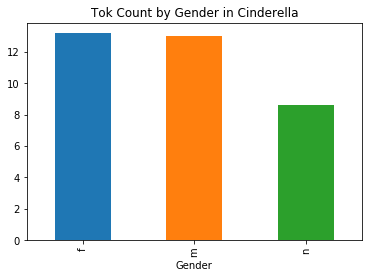

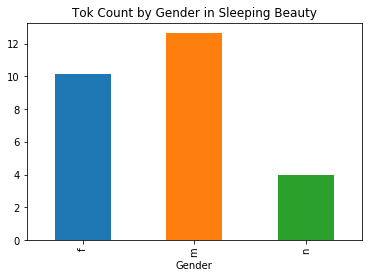

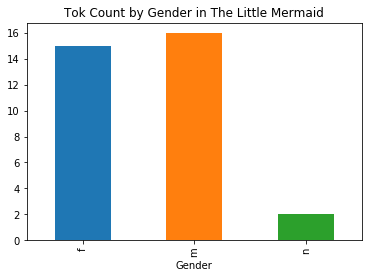

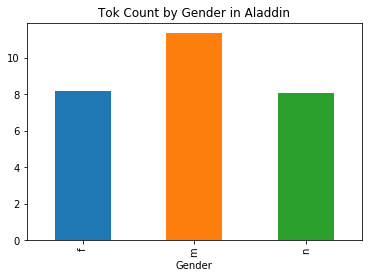

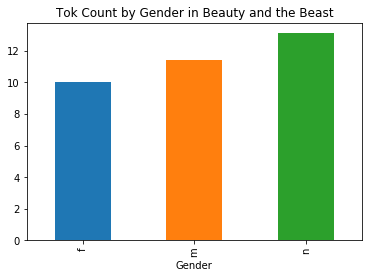

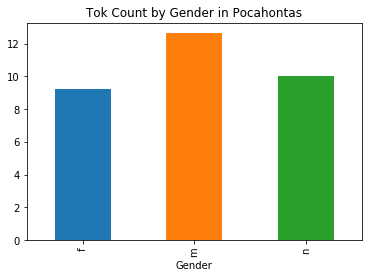

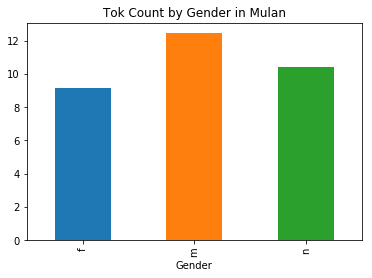

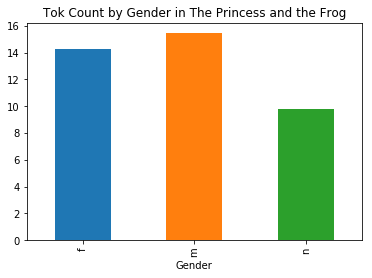

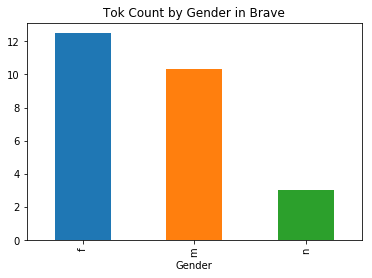

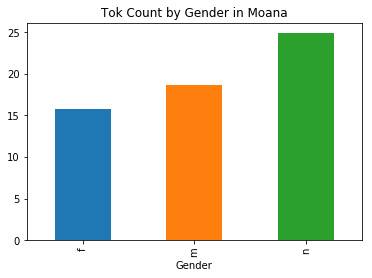

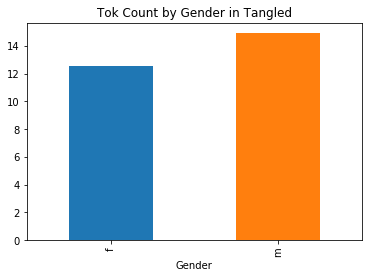

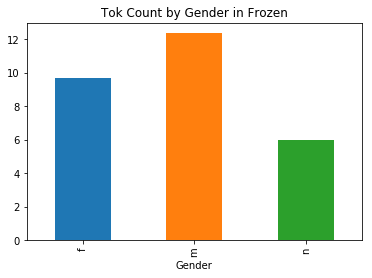

In [34]:
for movie in disney_df_dialogue.Movie.unique():
    movie_series = disney_df_dialogue[disney_df_dialogue.Movie == movie].groupby('Gender')["Token_Count"].describe()["mean"]
    plt.figure()
    movie_series.plot(x='Gender', y='Token Count', kind = 'bar', title = 'Tok Count by Gender in {}'.format(movie))
    plt.show